# **PLQY_individual**

_by Felix Eickemeyer_

PLQY, this notebook is based on "PLQY 1.3.4.ipynb".
Calibration and correction has to be done before.
__

_Version 10.11.2021 in Python 3_

_Change log:_  
0.1.0: My package used  
1.0.0: First version bug free and usable for thot desktop  
1.1.0: All graphs saved as assets  
1.2.0: Experminetal parameters as own class (exp_param)   

In [1]:
import os
from os import getcwd, listdir
import thot
from thot import ThotProject
import importlib
from importlib import reload

from FTE_analysis_libraries import PLQY as lqy
from FTE_analysis_libraries import Spectrum as spc
from FTE_analysis_libraries.General import f1240, Vsq, V_loss, QFLS

reload(spc)
reload(lqy)
pass

In [2]:
#Perovskite
which_sample = 'Haizhou-FAPbI3'
#which_sample = 'FAPbI3'

#DSC
#which_sample = 'Yameng DSC'
#which_sample = 'dye on TiO2'
#which_sample = 'dye on Al2O3'
#which_sample = 'Coumarin 153'
#which_sample = 'MS5'
#which_sample = 'XY1b'

param = lqy.exp_param(which_sample = which_sample, excitation_laser = None, PL_left = None, PL_right = None, PL_peak = None, corr_offs_left = 40, corr_offs_right = 50, PL_peak_auto = False, eval_Pb = False)

In [3]:
# Initializes Thot project
db = ThotProject( dev_root = r'PLQY_results' )

In [4]:
samples = db.find_assets({'type' : 'calibrated PL spectrum'})
names = list({sample.metadata['name'] for sample in samples})
names.remove('no sample')
names

['glass-per-spiro_1']

In [5]:
La = lqy.find({'metadata.name' : 'no sample', 'metadata.em_filter' : param.laser_marker}, samples, show_details = True)
Pa = lqy.find({'metadata.name' : 'no sample', 'metadata.em_filter' : param.PL_marker}, samples, show_details = True)

no sample--ip_laser--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_650BPF.csv
no sample--ip_laser--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_700LPF.csv


glass-per-spiro_1--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_650BPF.csv
glass-per-spiro_1--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_650BPF.csv
glass-per-spiro_1--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_700LPF.csv
glass-per-spiro_1--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_700LPF.csv
glass-per-spiro_1--fs--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_700LPF.csv
La = 1.42e+18 1/(s m2)
Lb = 1.24e+18 1/(s m2)
Lc = 2.58e+17 1/(s m2)
Pa = 0.00e+00 1/(s m2)
Pb = 4.69e+14 1/(s m2)
Pc = 1.14e+17 1/(s m2)
A = 1 - Lc/Lb = 79.2 %
PLQY = (Pc - (1 - A) * Pb) / (La * A) = 1.02e-01
File saved: C:\Users\dreickem\switchdrive\Work\Python\PL\Steady state PL\thot\PLQY_results\glass-per-spiro_1_absolute PL spectrum\glass-per-spiro_1_absolute PL spectrum.csv


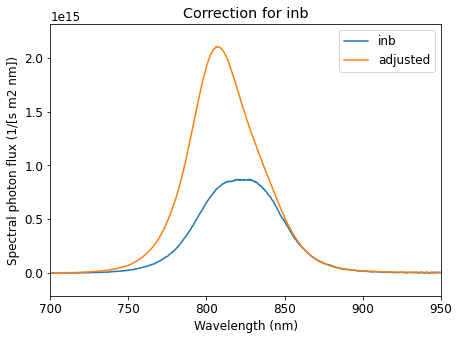

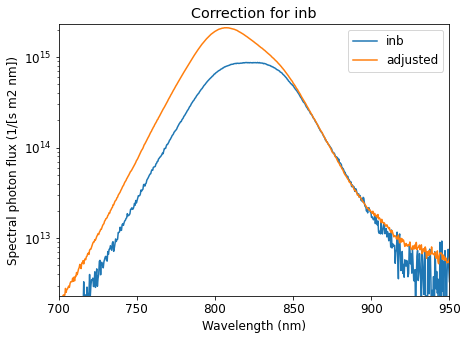

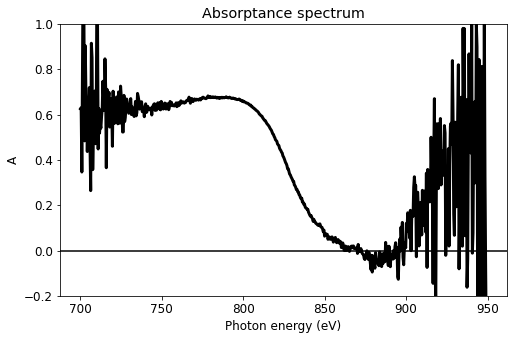

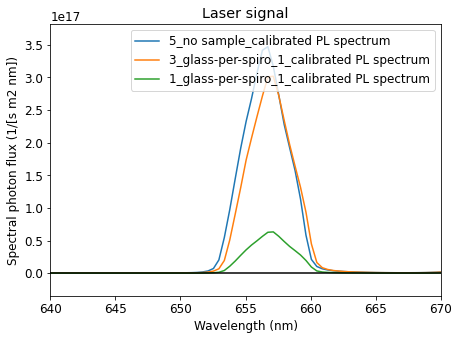

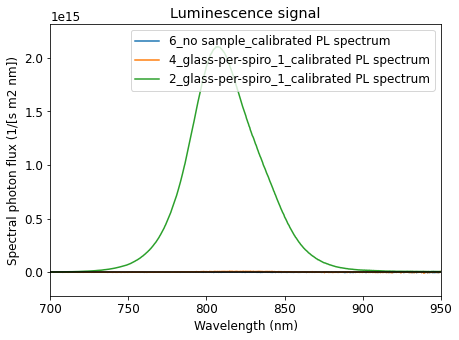

In [6]:
for idx in range(len(names)):
    show_details = True
    sample_name = names[idx]
    group = thot.filter({'metadata.name' : sample_name}, samples)
    Lb = lqy.find({'metadata.em_filter' : param.laser_marker, 'metadata.inboob' : 'outofbeam'}, group, show_details = show_details)
    Lc = lqy.find({'metadata.em_filter' : param.laser_marker, 'metadata.inboob' : 'inbeam'}, group, show_details = show_details)
    Pb = lqy.find({'metadata.em_filter' : param.PL_marker, 'metadata.inboob' : 'outofbeam'}, group, show_details = show_details)
    Pc = lqy.find({'metadata.em_filter' : param.PL_marker, 'metadata.inboob' : 'inbeam'}, group, show_details = show_details)
    fs = lqy.find({'metadata.em_filter' : param.PL_marker, 'metadata.fsip' : 'fs'}, group, show_details = show_details)

    show_details = True

    sPL = lqy.PLQY_dataset(db, La, Lb, Lc, Pa, Pb, Pc, fs, sample_name, param)
    #sPL.fs.plot(yscale = 'linear', title = sPL.fs_asset.metadata['orig_fn'])
    #sPL.P.plot()

    sPL.find_PL_peak()
    sPL.inb_adjust(adj_factor = None, show_adjust_factor = False, show = show_details)
    sPL.calc_abs(what = 'inb', show_details = show_details)

    #sPL.oob_adjust(adj_factor = None, show_adjust_factor = True, show = True)
    #sPL.calc_abs(what = 'oob', show_details = show_details)

    sPL.calc_PLQY(show = show_details, show_lum = 'linear')

    sPL.abs_pf_spec(nsuns = 1)

    sPL.save_asset()